In [1]:
from __future__ import print_function
import pandas as pd
from random import seed
from random import random
import math
import patsy
import numpy as np
#import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

In [2]:
station_list = pd.read_csv('~/station_list.csv')

In [3]:
station_list.head()

,x
0,1009
1,10092
2,10093
3,1013
4,10144


In [4]:
for i in range(len(station_list)):
    station_list.iloc[i,0] = str(station_list.iloc[i,0]).zfill(6)

station_list.head()

,x
0,001009
1,010092
2,010093
3,001013
4,010144


In [5]:
elnino_50_slope = []
elnino_50_pvalue = []
elnino_99_slope = []
elnino_99_pvalue = []
lanina_50_slope = []
lanina_50_pvalue = []
lanina_99_slope = []
lanina_99_pvalue = []

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [6]:
seed(123)

for i in range(len(station_list)):
    
    file_elnino = '~/' + station_list.iloc[i,0] + '_Elnino.csv'
    elnino = pd.read_csv(file_elnino)
    random_elnino = np.random.random(len(elnino))
    elnino['precipitation'] = elnino['precipitation'] + random_elnino/100
    elnino['precipitation'] = elnino['precipitation'].apply(lambda x : math.log10(x))
    mod_elnino = smf.quantreg('precipitation ~ maxtemperature', elnino)
    res_elnino_50 = mod_elnino.fit(q=0.5)
    res_elnino_99 = mod_elnino.fit(q=0.99)
    
    elnino_50_slope.append(res_elnino_50.params[1])
    elnino_50_pvalue.append(res_elnino_50.pvalues[1])
    elnino_99_slope.append(res_elnino_99.params[1])
    elnino_99_pvalue.append(res_elnino_99.pvalues[1])
    
    file_lanina = '~/' + station_list.iloc[i,0] + '_Lanina.csv'
    lanina = pd.read_csv(file_lanina)
    random_lanina = np.random.random(len(lanina))
    lanina['precipitation'] = lanina['precipitation'] + random_lanina/100
    lanina['precipitation'] = lanina['precipitation'].apply(lambda x : math.log10(x))
    mod_lanina = smf.quantreg('precipitation ~ maxtemperature', lanina)
    res_lanina_50 = mod_lanina.fit(q=0.5)
    res_lanina_99 = mod_lanina.fit(q=0.99)
    
    lanina_50_slope.append(res_lanina_50.params[1])
    lanina_50_pvalue.append(res_lanina_50.pvalues[1])
    lanina_99_slope.append(res_lanina_99.params[1])
    lanina_99_pvalue.append(res_lanina_99.pvalues[1])
    



D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [7]:
result = {'elnino_50_slope': elnino_50_slope,
          'elnino_50_pvalue': elnino_50_pvalue,
          'elnino_99_slope': elnino_99_slope,
          'elnino_99_pvalue': elnino_99_pvalue,
          'lanina_50_slope': lanina_50_slope,
          'lanina_50_pvalue': lanina_50_pvalue,
          'lanina_99_slope': lanina_99_slope,
          'lanina_99_pvalue': lanina_99_pvalue}
result = pd.DataFrame(result)
result.to_csv('~/result_2.csv')


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
result = pd.read_csv('~/result_2.csv')
result.iloc[:,0] = station_list.iloc[:,0]

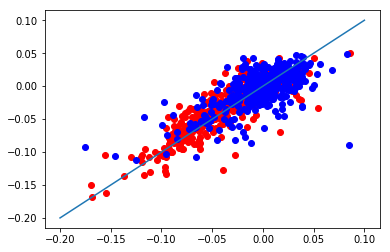

In [10]:
plt.scatter(result['elnino_50_slope'], result['lanina_50_slope'], color = 'red')
plt.scatter(result['elnino_99_slope'], result['lanina_99_slope'], color = 'blue')
x = np.linspace(-0.2, 0.1, 1000)
plt.plot(x, x + 0, linestyle='solid')
plt.show()

In [11]:
len(result[result['elnino_50_slope'] > result['lanina_50_slope']]) / len(result)

0.36444444444444446

In [12]:
len(result[result['elnino_99_slope'] > result['lanina_99_slope']]) / len(result)

0.5133333333333333

In [13]:
from scipy import stats
stats.ttest_rel(result['elnino_50_slope'], result['lanina_50_slope'])

Ttest_relResult(statistic=-4.714315560711927, pvalue=3.241228813789226e-06)

In [14]:
stats.ttest_rel(result['elnino_99_slope'], result['lanina_99_slope'])

Ttest_relResult(statistic=0.7477577714134495, pvalue=0.45499772299775754)